#Q-learning

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Q-learning')

In [ ]:
!pip install -r requirements.txt

In [ ]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)

        q_value = self.q_values[state][action]

        ################## write code ################################
        next_q_value = max(self.q_values[next_state])  # 다음 상태에서 최대 Q 값을 선택 (Q-learning)
        td_error = reward + self.gamma * next_q_value - q_value  # TD error 계산
        self.q_values[state][action] = q_value + self.alpha * td_error  # Q 값을 업데이트
        ##############################################################

    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action

In [ ]:
from utils import gen_wrapped_env, show_video

In [ ]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, agent_position)

In [ ]:
rewards = []
for ep in range(4000):
    done = False
    obs = env.reset()
    action = agent.act(obs)

    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)

        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0.784
episode: 460, rewards: 0
episode: 480, rewards: 0.55
episode: 500, rewards: 0
episode: 520, rewards: 0.45999999999999996
episode: 540, rewards: 0.514
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0.73
episode: 720, rewards: 0.874
episode: 740, rewards: 0.37
episode: 760, rewards: 0
episode: 780, r

In [ ]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.03419, 0.03431, 0.03738],
 3: [0.01808, 0.01786, 0.03327],
 6: [0.01826, 0.01833, 0.03947],
 9: [0.04109, 0.04117, 0.04897],
 15: [0.01282, 0.0127, 0.08214],
 12: [0.06022, 0.06067, 0.06299],
 27: [0.03045, 0.02972, 0.1835],
 24: [0.08197, 0.08161, 0.08402],
 36: [0.09314, 0.09296, 0.10442],
 39: [0.33151, 0.32566, 0.37932],
 30: [0.03754, 0.03937, 0.27796],
 18: [0.01639, 0.02191, 0.12689],
 21: [0.12568, 0.11541, 0.19999],
 33: [0.25121, 0.23038, 0.36998],
 45: [0.0, 0.0, 0.0],
 42: [0.413, 0.43467, 0.5597]}

In [ ]:
show_video()

In [ ]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')

In [ ]:
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

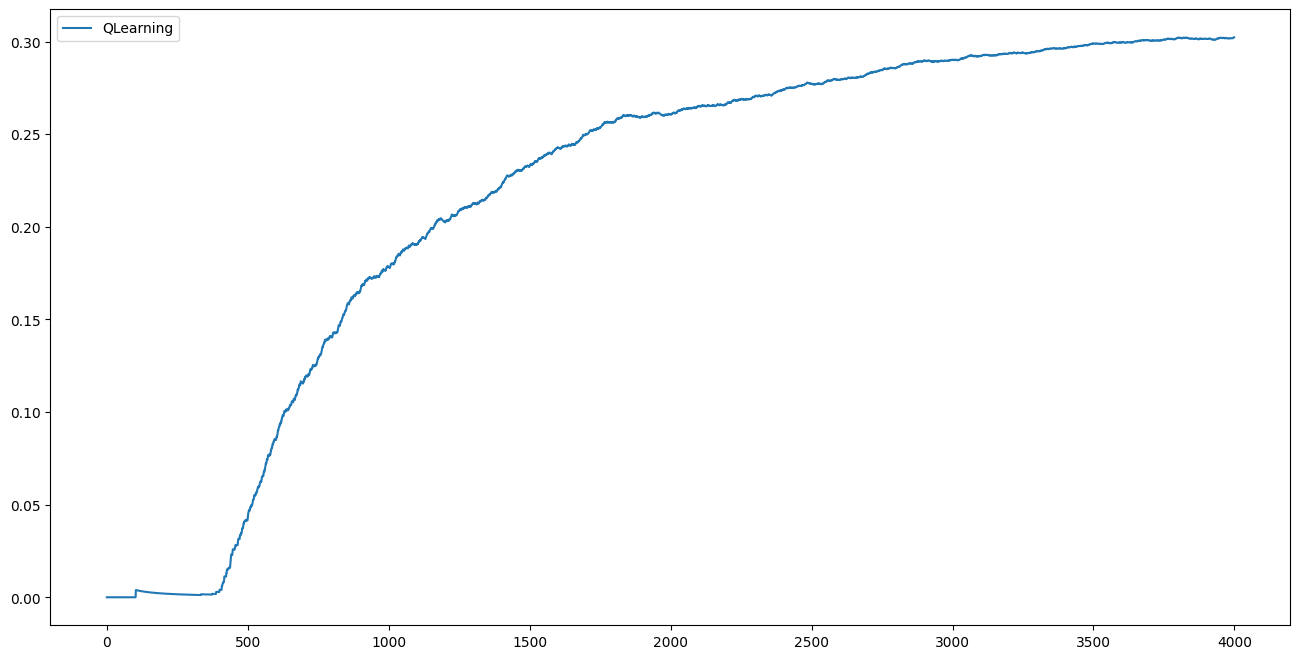

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.legend()